In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#Study data files
mouse_metadata_path = "C://Users//16476//Documents//module_5_starter_code//Pymaceuticals//data//Mouse_metadata.csv"
study_results_path =  "C://Users//16476//Documents//module_5_starter_code//Pymaceuticals//data//Study_results.csv"

# Read the mouse data and the study results
Mouse_metadata = pd.read_csv(mouse_metadata_path)
Study_results = pd.read_csv(study_results_path)

#combine the data into a single dataset
Mice_study_df= pd.merge(Study_results, Mouse_metadata, on="Mouse ID", how = "left")
#display the data table for preview
Mice_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
#Checking the number of mice
Mice_study_df['Mouse ID'].nunique()

249

In [12]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
Mice_id_dup = Mice_study_df.loc[Mice_study_df.duplicated (subset= ['Mouse ID','Timepoint']),'Mouse ID'].unique()
Mice_id_dup

array(['g989'], dtype=object)

In [13]:
Mice_id_dup = Mice_study_df.loc[Mice_study_df['Mouse ID'] == "g989",:]
Mice_id_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Mice_study_df[Mice_study_df["Mouse ID"].isin(Mice_id_dup)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Checking the number of mice in the clean DataFrame.
clean_df = clean_df["Mouse ID"].nunique()
clean_df

249

In [17]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_by_drug = Mice_study_df.groupby('Drug Regimen')
means = grouped_by_drug.mean()['Tumor Volume (mm3)']
medians = grouped_by_drug.median()['Tumor Volume (mm3)']
variances = grouped_by_drug.var()['Tumor Volume (mm3)']
standards = grouped_by_drug.std()['Tumor Volume (mm3)']
sems = grouped_by_drug.sem()['Tumor Volume (mm3)']

summary = pd.DataFrame(means)
newSummary = summary.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})

newSummary["Median Tumor Volume"] = medians
newSummary["Tumor VolumeVariance"] = variances
newSummary["Tumor Volume Std. Dev."] = standards
newSummary["Tumor Volume Std. Err."] = sems

newSummary



,Mean Tumor Volume,Median Tumor Volume,Tumor VolumeVariance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
table = grouped_by_drug.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
table

C:\Users\16476\AppData\Local\Temp\ipykernel_21336\727922749.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  table = grouped_by_drug.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Mice Tested')

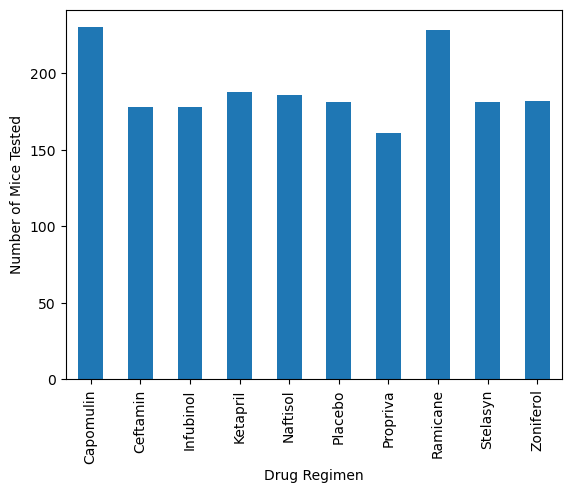

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_count = grouped_by_drug.count()['Tumor Volume (mm3)']
drug_count_df = pd.DataFrame(drug_count)
barPlot = drug_count_df.plot.bar(legend=False)
barPlot
plt.ylabel("Number of Mice Tested")

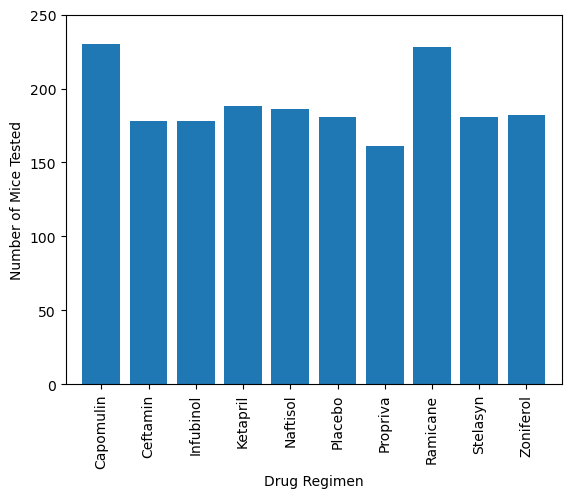

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import numpy as np
locations = list(np.arange(len(drug_count)))
new_drug_count_df = drug_count_df.reset_index()

plt.bar(locations, new_drug_count_df['Tumor Volume (mm3)'])
plt.xticks(locations, new_drug_count_df['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(drug_count)-.25)
plt.ylim(0, 250)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()


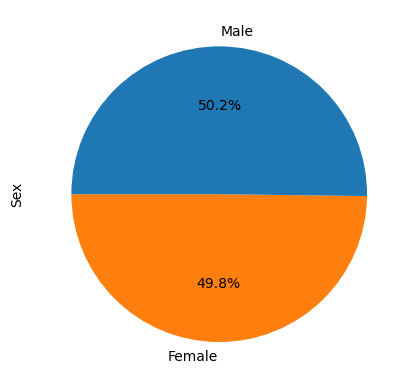

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = Mouse_metadata.groupby("Sex").count()
sex_count = [gender_count["Mouse ID"]]
colors = ["tab:orange", "tab:blue"]
gender_count["Mouse ID"].plot.pie(y='sex_count', colors=colors, autopct="%1.1f%%",startangle=180)
plt.ylabel('Sex')
plt.show()

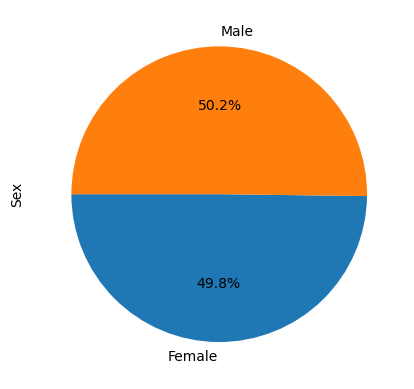

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = list(gender_count['Mouse ID'])
label_names = list(gender_count.index)
plt.pie(sex_count, labels=label_names, autopct="%1.1f%%", startangle=180)
plt.ylabel('Sex')

plt.show()

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_name = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs_name_df = Mice_study_df[Mice_study_df['Drug Regimen'].isin(drugs_name)]

last4tumor_df = drugs_name_df.groupby(['Drug Regimen','Mouse ID']).agg(Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

last4tumor_unstack_df = last4tumor_df.stack(level=0).unstack(level=0)
last4tumor_unstack_df.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


In [24]:
counter = 0

for drug in drugs_name:
    quartiles = last4tumor_unstack_df[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1
    

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.


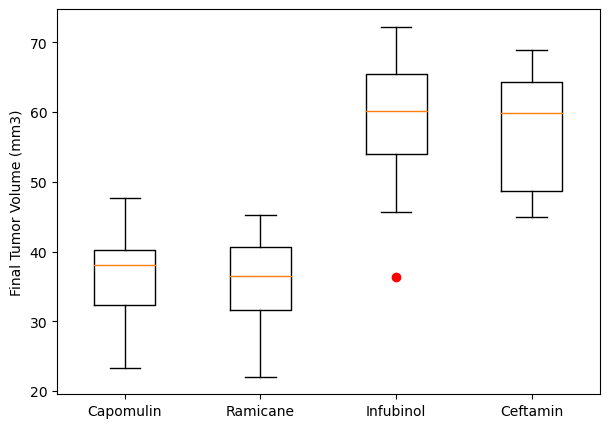

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for drug in drugs_name:
    boxplot_list.append(list(last4tumor_unstack_df[drug].dropna()))
fig1, ax = plt.subplots(figsize=(7,5))
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='red')
plt.xticks([1,2,3,4],drugs_name)
plt.show()

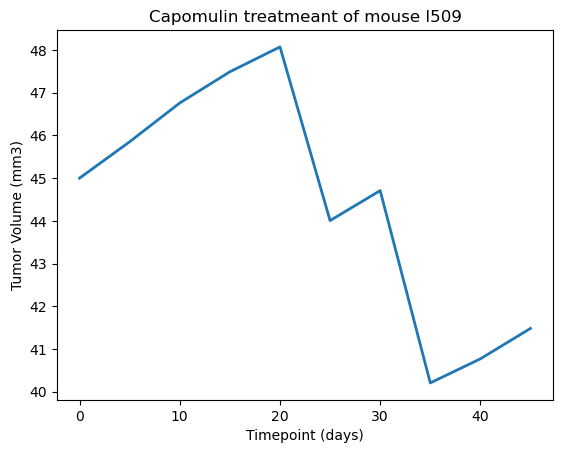

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = Mice_study_df.loc[Mice_study_df["Drug Regimen"] == "Capomulin",:]
new_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
x_axisTimePoint = new_df["Timepoint"]
tumor_size = new_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTimePoint, tumor_size,linewidth=2, markersize=12)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

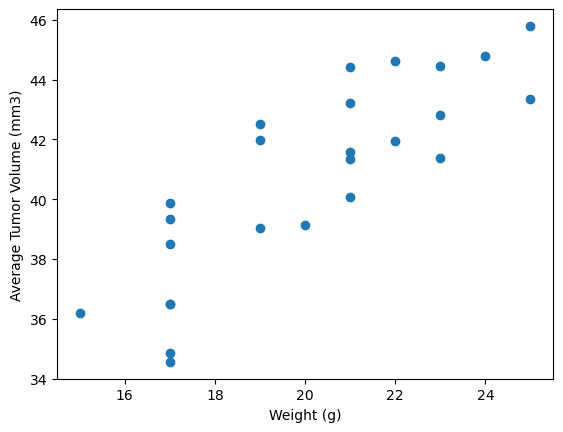

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")
model=st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

The correlation between mouse weight and average tumor volume is 0.84


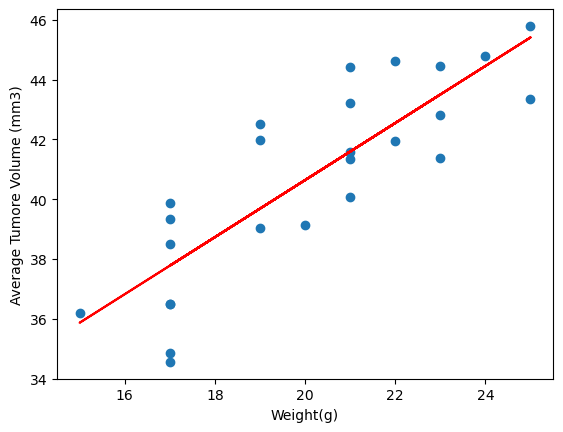

In [29]:
slope=0.9544396890241049
intercept=21.552160532685008
y_values = capomulin_avg['Weight (g)']*slope+intercept
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()